#Основы вычислительной математики и погрешности.

## *Специфика вычислительной математики.*#

Вычислительная математика является частью высшей математики, компьютерных наук и науки о математическом моделировании. Однако она имеет свою специфику (пункты по книге И.Б. Петрова "Вычислительная математика для физиков" (2021), пример взят из интернета https://3ys.ru/chislennye-metody-v-zadachakh-matematicheskogo-analiza/o-reshenii-kvadratnogo-uravneniya.html ):

1) дискретизация непрерывных областей;

2) в расчётах всегда присутствует машинная погрешность округления, так как количество знаков после запятой ограничено;  

3) выбор численного метода влияет на результат решения задачи;

4) исследуется экономичность вычислений;

5) важна обусловленность задачи - чувствительность её решения к малым изменениям входных данных;

6) устойчивость численных методов – это чувствительность методов к малым изменениям входных данных.

В качестве примера специфики вычислительной математики приведём задачу решения квадратного уравнения. В курсе школьной алгебры все квадратные уравнения решают просто через дискриминант, но в вычислительной математике такой метод работает далеко не для всех квадратных уравнений.

Необходимо исследовать возможность появления погрешностей в зависимости от соотношения между коэффициентами уравнения. Рассмотрим один из важнейших случаев, когда коэффициент b (при х) значительно превышает по абсолютной величине остальные (a и с). В этом случае корень из дискриминанта очень близок |b| и возникает проблема вычитания друг из друга близких значений. Минимальный корень очень маленький и для получения его точного значения необходимо либо повысить количество используемых разрядов в записи вещественного числа, либо вычислять его иначе (например, больший корень по обычной формуле, а меньший вычислять на основе большего по теореме Виета).

Если написать алгоритм вычисления корня квадратного уравнения с учётом этих особенностей, то его блок-схема выглядит так (R - это вещественная часть корня, I - мнимая).

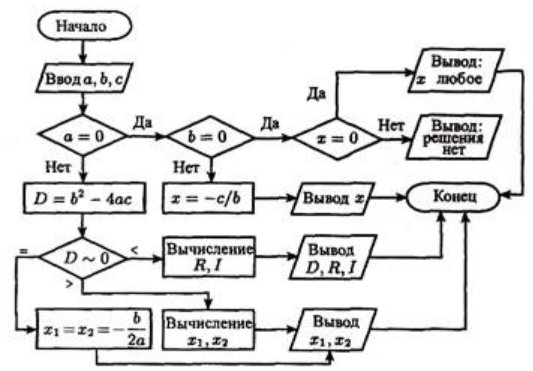  


Если подумать, какие могут быть проблемы с этим алгоритмом, то можно обнаружить как минимум три ситуации, когда он не работает.

Пример 1. а = 10^(-200), b=-3•10^(-200), с = 2•(10^-200). При вычислении произведений b^2 и 4ас получается машинный нуль, т.е. D = 0; решение пойдет по ветви равных корней: х1= х2 = 1.5. Точные значения корней, как нетрудно видеть, х1 = 1, х2 = 2.

Пример 2. а=10^200, b = -3•10^200, с=2•10^(-200). Этот вариант аналогичен предыдущему случаю с той лишь разницей, что вместо получения машинного нуля произойдет переполнение и прерывание счета.

Пример 3. а = 10^(-200), b =10^200, с=-10^200. Это трудный для реализации на компьютере случай. В практических расчетах встречаются уравнения с малым коэффициентом при х^2. В этом случае b^2>> 4ас, но при вычислении b^2 произойдет переполнение. Простейшим выходом из этого положения может быть сведение к случаю а = 0 с обязательной проверкой других коэффициентов.

Есть современные программные пакеты, которые умеют квадратные уравнения решать по куда более сложным алгоритмам. Например, Вольфрам умеет сам определять, сколько разрядов нужно, и автоматически подключает длинную арифметику. Он также умеет использовать разные формулы (он их сам выводит с помощью алгоритмов символьной арифметики), выбирая среди них те, которые считают точнее (умеет это анализировать и сравнивать, там очень нетривиальный алгоритм) и даже самостоятельно определяет погрешность вычислений. Однако, и для Вольфрама можно найти квадратные уравнения, которые он решает неправильно.

https://www.wolframalpha.com/input/?i=%2810%5E%28-200%29%29*x%5E2+%2B+%2810%5E%28200%29%29*x+-+10%5E%28200%29+%3D+0  

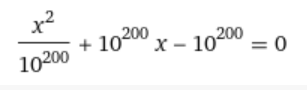  

Меньший корень здесь очень близок к 1, а Вольфрам выдаёт, что он очень близок к нулю.










## *Виды погрешностей. Погрешности округления и метода.*#

Любая вычисляемая или измеряемая величина определяется с погрешностью. Это значит, что приближённое значение величины, вычисляемое на компьютере, отличается от истинного.

Погрешности бывают абсолютные и относительные. Абсолютная погрешность - это максимальное отклонение от истинного значения, взятое по модулю. Относительная погрешность - вычисленное в процентах.

Погрешности прежде всего разделяют на устранимые и неустранимые. Неустранимыми называют погрешности, вызванные неопределённостью входных данных. Устранимые погрешности бывают двух видов: погрешности округлений при вычислениях на компьютере и погрешности вычислительных методов.

**Представление вещественных чисел в памяти ПК**


Вещественные числа обычно представляются в виде чисел с плавающей запятой. Числа с плавающей запятой — один из возможных способов представления действительных чисел, который является компромиссом между точностью и диапазоном принимаемых значений, его можно считать аналогом экспоненциальной записи чисел. Число с плавающей запятой состоит из набора отдельных двоичных разрядов, условно разделенных на так называемые знак (англ. sign), порядок (англ. exponent) и мантиссу (англ. mantis). В стандарте IEEE 754 число с плавающей запятой представляется в виде набора битов, часть из которых кодирует собой мантиссу числа, другая часть — показатель степени, и ещё один бит используется для указания знака числа (0 — если число положительное, 1 — если число отрицательное). При этом порядок записывается как целое число в коде со сдвигом, а мантисса — в нормализованном виде своей дробной частью в двоичной системе счисления. Порядок и мантисса — целые числа, которые вместе со знаком дают представление числа с плавающей запятой в виде:

(−1)^ S × M × B^E,

где S — знак, B — основание, E — порядок, а M — мантисса.

Нормальной формой (англ. normal form) числа с плавающей запятой называется такая форма, в которой мантисса (без учёта знака) в десятичной системе находится на полуинтервале [0;1). Эта форма неоднозначна, поэтому используют нормализованную (англ. normalized), в которой мантисса десятичного числа принимает значения от 1 (включительно) до 10 (не включительно), а мантисса двоичного числа принимает значения от 1 (включительно) до 2 (не включительно). То есть в мантиссе слева от запятой до применения порядка находится ровно один знак. В такой форме любое число (кроме 0) записывается единственным образом. Ноль же представить таким образом невозможно, поэтому стандарт предусматривает специальную последовательность битов для задания числа 00 (а заодно и некоторых других полезных чисел, таких как −∞ и +∞).

IEEE 754-2008 Standard for Floating-Point Arithmetic определяет представление и операции для чисел с плавающей точкой в компьютерных системах. Рассматривает форматы хранения, правила арифметики (в том числе и правила округления), стандартные и расширенные функции для типов одинарной (single), двойной (double), расширенной (extended) и расширяемой (extendable) точности, а также рекомендует форматы для обмена данными. В рамках используемых форматов определяет:

как представлять нормализованные и денормализованные положительные и отрицательные числа с плавающей запятой;


как представлять специальные величины «плюс бесконечность» и «минус бесконечность» (±Infinity, ±∞), ноль;


исключительные ситуации: деление на ноль, переполнение, потеря значимости - результат операции становится настолько близким к нулю, что порядок числа выходит за пределы разрядной сетки, работа с денормализованными числами и другие;


как представлять специальные величины «Не число» (NaN, not a number).


Неопределенность или NaN (от not a number) – это представление, придуманное для того, чтобы арифметическая операция могла всегда вернуть какое-то не бессмысленное значение. В IEEE754 NaN представлен как число, в котором E=Emax+1, а мантисса не нулевая. Любая операция с NaN возвращает NaN. При желании в мантиссу можно записывать информацию, которую программа сможет интерпретировать. Стандартом это не оговорено и мантисса чаще всего игнорируется.

Как можно получить NaN? Одним из следующих способов:

∞+(- ∞);

0 × ∞ ;

0/0;

∞/∞ ;

sqrt(x), где x<0.

По определению NaN ≠ NaN, поэтому, для проверки значения переменной нужно просто сравнить ее с собой. Два вида NaN: тихий NaN (qNaN) и сигнализационный NaN (sNaN). NaN может нести полезную нагрузку, предназначенный для диагностической информации, указывающей источник, вызвавший NaN. Знак NaN не имеет никакого значения, но может быть предсказуемым в некоторых случаях.

Денормализованные числа (англ. denormalized/subnormal numbers) - это способ увеличить количество представимых числом с плавающей запятой значений около нуля, дабы повысить точность вычислений. Каждое значение денормализованного числа меньше самого маленького нормализованного ("обычного") значения числа с плавающей запятой. Согласно стандарту, если порядок равен своему минимальному значению (все его биты — нули, а истинное значение порядка равно его сдвигу) и все биты мантиссы равны нулю, то это ±0. Если же мантисса не равна нулю, то это число с порядком, на единицу большим минимального (все биты порядка, кроме младшего — нули) и данной мантиссой, целая часть которой считается равной нулю, а не единице.

В IEEE 754-2008 денормализованные числа (denormal или denormalized numbers) были переименованы в subnormal numbers, то есть в числа, меньшие "нормальных". Поэтому их еще называют "субнормальными".


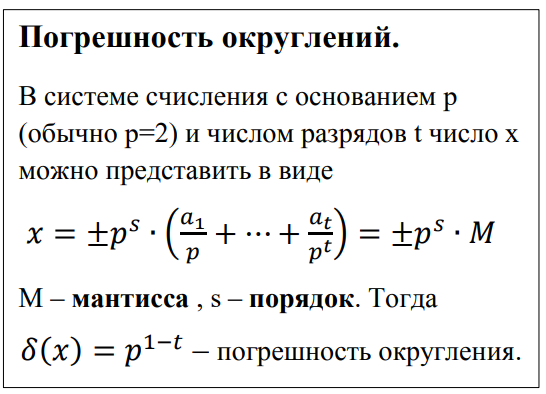  


1) Ошибки, связанные с точностью представления вещественных чисел в формате IEEE754.

2) Ошибки, связанные с неправильным приведением типов данных.  

3) Ошибки, вызванные сдвигом мантисс. Циклические дыры. Эти ошибки связаны с потерей точности результата при неполном пересечении мантисс чисел на числовой оси. Если мантиссы чисел не пересекаются на числовой оси, то операции сложения и вычитания между ними невозможны. Правило (a+b) + c = (a+c) + b обычно не выполняется в машинной арифметике, так как погрешность зависит от того, в каком порядке складывать.

4) Ошибки, вызванные округлением. Грязный ноль – когда переменная, которая должна быть равна нулю, не равна нулю из-за округления, которое делает процессор – вследствие этого относительная погрешность результата может достигать бесконечности.

5) Ошибки на границе норма/денорма числа (числа убийцы). Эти ошибки возникают при работе с числами находящимися на границе нормализованного/денормализованного представления чисел. Они связаны с различием в представления чисел в формате IEEE754 и в различии формул перевода формата IEEE754 в вещественные числа. То есть устройства (или программы) должны применять различные алгоритмы в зависимости от положения вещественного числа на числовой оси формата.

Кроме того, что это приводит к усложнению устройств и алгоритмов, ещё возникает неопределённость переходной зоны. Неопределённость переходной зоны заключается в том, что стандарт не определяет конкретного значения границы перехода. По сути дела граница перехода находится между двумя вещественными числами: последним денормализованным числом 000FFFFFFFFFFFFF и первым нормализованным числом 0010000000000000.  

Так как граница является вещественным числом, то её точность можно задавать до бесконечности и цифровому устройству или программе может не хватить разрядности для принятия решения, к какому диапазону отнести число. Для примера можно привести баг https://bugs.php.net/bug.php?id=53632 , который вызвал панику в 2011-м.

Ввод числа 2.2250738585072011e-308 вызывал зависание процесса со 100 % загрузкой процессора. Сообщение о баге поступило 30.12.2010, исправлено было 10.01.2011.

Так как PHP препроцессор используют большинство серверов, то у любого пользователя сети в эти 10 дней была возможность вырубить большую часть информационные ресурсов планеты, используя данную уязвимость.

С ошибками округления связано огромное количество крупных аварий, например:

– Взрыв ракеты "Пэтриот» в Саудовской Аравии 25 февраля 1991, который привел к гибели 28 человек, связан с ошибками округления.

– Взрыв ракеты Ариан-5 сразу после старта при ее первом испытании во Французской Гвиане 4 июня 1996 был следствием переполнения числовой сетки компьютера.

– 23 августа 1991 в Гандсфиорде в Норвегии затонула нефтяная платформа, что привело к убытку почти в один миллиард долларов – из-за ошибок округления при выполнении конечно-элементного анализа при моделировании.

В вычислительной математике изучают погрешности используемых методов. Многие из них сводятся к оценкам остаточного члена в ряде Тейлора. Например:


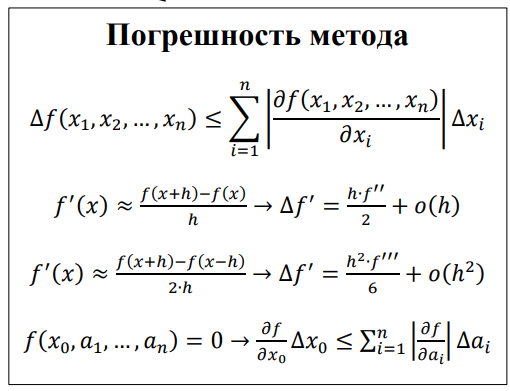  


## *Примеры решения теоретических задач.*#

**Пример 1.**


Пусть $x_0-$ однократный действительный корень полинома $P_n(x)=a_n x^n+\ldots+a_0$, у которого все коэффициенты $a_j$ известны с достаточно малой погрешностью $\Delta$. Какова погрешность корня $x_0 ?$


**Решение.**


Так как корень $x_0$ изолированный, при небольшом приращении коэффициентов $a_j \rightarrow a_j+\Delta a_j$ корень $x_0 \rightarrow x_0+\Delta x_0$. Используя уравнения $P_n\left(x_0,\left\{a_j\right\}\right)=0 \quad$ и $\quad P_n\left(x_0+\Delta x_0,\left\{a_j+\Delta a_j\right\}\right)=0 \quad$ и малость приращений $\Delta a_j \leq \Delta, \quad j=0, \ldots, n \quad$ и $\quad \Delta x_0, \quad$ имеем $0=\Delta P \approx\left(n a_n x_0^{n-1}+\ldots+a_1\right) \Delta x_0+\Delta a_n x_0^n+\ldots+\Delta a_0$. Отсюда
$$
\left|\Delta x_0\right| \leq \frac{\left|\Delta a_n x_0^n\right|+\ldots+\left|\Delta a_0\right|}{\left|\left(n a_n x_0^{n-1}+\ldots+a_1\right)\right|} \leq \frac{\left(\left|x_0\right|^n+\ldots+1\right) \Delta}{\left|\left(n a_n x_0^{n-1}+\ldots+a_1\right)\right|}
$$

**Пример 2.**

Пусть производная функции $f^{\prime}(x)$ приближенно вычисляется в точке $x_0$ на ЭВМ по формуле: $f^{\prime}\left(x_0\right) \approx\left(f\left(x_0+h\right)-f\left(x_0\right)\right) / h$, причем значения функции $f(x)$ сами имеют погрешности округления, связанные с конечностью мантиссы. Почему в этом случае не следует брать слишком малый $h$ ? Оцените оптимальный шаг $h$, предположив, что $f^{\prime \prime}(x)$ существует и непрерывна, $\left|f^{\prime \prime}(x)\right| \leq M_2$ на отрезке $\left[x_0, x_0+h\right]$ и длина мантиссы равна $t$.

**Решение.**


Применяя формулу Тейлора, получим
$$
f^{\prime}\left(x_0\right)-\left(f\left(x_0+h\right)-f\left(x_0\right)\right) / h=-h f^{\prime \prime}(\xi) / 2,
$$
где $\xi \in\left[x_0, x_0+h\right]$. Погрешность округления при вычислении $f(x)$ можно грубо оценить как $2^{1-t}\left|f\left(x_0\right)\right|$. Таким образом, полная погрешность по модулю не превосходит $h M_2 / 2+2^{-t+2} f\left(x_0\right) / h \geq 2 \sqrt{M_2 2^{1-t} \mid f\left(x_0\right)}$, и оптимальный шаг $h_0=2 \sqrt{2^{1-t}\left|f\left(x_0\right)\right| / M_2}$.

**Пример 3.**


Пусть задана последовательность чисел $x_n, n=0,1,2, \ldots$, причем $x_{n+1}+100 x_n=101$. При $x_0=1$ все $x_n=1$. Если допустить маленькую погрешность в задании $x_0$, например, $x_0=1+10^{-6}$, то погрешность $x_n$ будет быстро возрастать с ростом $n: x_1=1-10^{-4}, x_2=1+10^{-2}, x_3=1-1=0$, $x_2=1+10^2, \ldots$ При выборе $x_0=-1$ имеем: $x_1=201, x_2=-19999, \ldots$ Но теперь погрешность в начальных данных уже не будет так сильно портить результат вычислений: $x_1=201-10^{-4}, x_2=-19999+10^{-2}, \ldots$ Объясните кажущийся парадокс.


**Решение.**

Для соотношения $x_{n+1}+100 x_n=101$ нетрудно записать решение для произвольного $n$ в общем виде: $x_n=C(-100)^n+1$, где константа $C$ определяется из начальных данных. Теперь видно, что $x_0=1-$ это специальный случай, когда $x_n$ не растут с ростом $n$. Небольшое отклонение приводит к быстро возрастающей относительной погрешности, тогда как для другого случая относительная погрешность почти не меняется.